# Model Building and Graphing

This file shall be used as a testbed for the linear mixed effects model as well as graphing the results

In [1]:
import pandas as pd
from _functions import get_relative_path

data = pd.read_csv(get_relative_path() / "comments.csv")
transcripts = pd.read_csv(get_relative_path() / "transcripts.csv")

transcripts.head()

c:\Users\Trevo\OneDrive\Documents\GitHub\NLP-Midterm\Code\_functions.py:14: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Trevo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Trevo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,index,source,transcript,sentiment
0,1,bbc_news,We begin with the breaking news. A fresh trade...,"{'compound': -0.8748, 'positive': 0.087, 'neut..."
1,2,bbc_news,There are growing fears of a major global trad...,"{'compound': 0.825, 'positive': 0.095, 'neutra..."
2,3,bbc_news,I'm Helena Humphrey. Good to have you with us....,"{'compound': 0.9803, 'positive': 0.092, 'neutr..."
3,1,bloomberg,"Congratulations, Mr.\n\nWell, he's back and gu...","{'compound': -0.9962, 'positive': 0.076, 'neut..."
4,3,bloomberg,We are continuing to get headlines out of the ...,"{'compound': 0.9854, 'positive': 0.067, 'neutr..."


In [2]:
# DONE : Create a dummy one-hot encoding for the source
dummies = pd.get_dummies(data["leaning"], prefix="source", drop_first=True)
dummies = dummies.astype(int)
dummies_list = dummies.columns.tolist()

# Concat the one-hot dummy variables to the original data
data = pd.concat([data, dummies], axis=1)

# DONE : Convert Sarcasm to a binary variable
# data["sarcasm"] = data["sarcasm"].map({"Sarcastic": 1, "Not Sarcastic": 0})

# TODO : Join the transcripts sentiment column to the data using the source and index as key
data = pd.merge(
    data,
    transcripts[["source", "index", "sentiment"]],
    how="left",
    left_on=["source", "index"],
    right_on=["source", "index"],
)

data['negative_transcript'] = data['sentiment'].apply(lambda row: eval(row)['negative'])
data['neutral_transcript'] = data['sentiment'].apply(lambda row: eval(row)['neutral'])
data['positive_transcript'] = data['sentiment'].apply(lambda row: eval(row)['positive'])
data['compound_transcript'] = data['sentiment'].apply(lambda row: eval(row)['compound'])
data = data.drop(columns=["sentiment"])

data['negative_comment'] = data['vader_comment'].apply(lambda row: eval(row)['negative'])
data['neutral_comment'] = data['vader_comment'].apply(lambda row: eval(row)['neutral'])
data['positive_comment'] = data['vader_comment'].apply(lambda row: eval(row)['positive'])
data['compound_comment'] = data['vader_comment'].apply(lambda row: eval(row)['compound'])

data.head()

,index,source,leaning,reliability_score,bias_score,vader_comment,comment,vader_transcript,clean_comment,source_Left,source_Right,negative_transcript,neutral_transcript,positive_transcript,compound_transcript,negative_comment,neutral_comment,positive_comment,compound_comment
0,1,bbc_news,Center,44.73,-1.33,"{'compound': 0.3182, 'positive': 0.187, 'neutr...","You tariff me, I tariff you. It seems fair to ...",NaN,"you tariff me, i tariff you. it seems fair to me.",0,0,0.088,0.825,0.087,-0.8748,0.000,0.813,0.187,0.3182
1,1,bbc_news,Center,44.73,-1.33,"{'compound': 0.0, 'positive': 0.0, 'neutral': ...",Wonder how Trump administration is going to be...,NaN,wonder how trump administration is going to be...,0,0,0.088,0.825,0.087,-0.8748,0.000,1.000,0.000,0.0000
2,1,bbc_news,Center,44.73,-1.33,"{'compound': -0.7131, 'positive': 0.066, 'neut...","if Fentanyl enter US through Canada, why don't...",NaN,"if fentanyl enter us through canada, why don't...",0,0,0.088,0.825,0.087,-0.8748,0.196,0.738,0.066,-0.7131
3,1,bbc_news,Center,44.73,-1.33,"{'compound': 0.296, 'positive': 0.098, 'neutra...","So trump said he’d tariff Canada, Canada threa...",NaN,"so trump said he’d tariff canada, canada threa...",0,0,0.088,0.825,0.087,-0.8748,0.056,0.846,0.098,0.2960
4,1,bbc_news,Center,44.73,-1.33,"{'compound': -0.6597, 'positive': 0.0, 'neutra...",America needs to stop blaming other countries ...,NaN,america needs to stop blaming other countries ...,0,0,0.088,0.825,0.087,-0.8748,0.435,0.565,0.000,-0.6597


In [3]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ensure leaning is treated as a categorical variable
data['leaning'] = data['leaning'].astype('category')

# Dichotomize compound_transcript by median
data['dichotomized_transcript'] = (data['compound_transcript'] > data['compound_transcript'].median()).astype(int)



# Define the linear mixed effects model
model = smf.mixedlm(
    "compound_comment ~ compound_transcript * leaning",  # Interaction term included
    data,
    groups=data["leaning"],  # Use dichotomized_transcript as grouping variable
)

# Fit the model
result = model.fit()

# Print summary of the model
print(result.summary())


                       Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        compound_comment
No. Observations:        9072           Method:                    REML            
No. Groups:              3              Scale:                     0.2018          
Min. group size:         2796           Log-Likelihood:            -5632.7655      
Max. group size:         3321           Converged:                 Yes             
Mean group size:         3024.0                                                    
-----------------------------------------------------------------------------------
                                     Coef.    Std.Err.     z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------
Intercept                             0.088        0.449  0.196 0.844 -0.792  0.969
leaning[T.Left]                      -0.066        0.636 -0.104 0.917 -1.312  1.179
leaning[T.Right

In [4]:
ols_betas = dummies_list + ['negative_transcript']
ols_betas

['source_Left', 'source_Right', 'negative_transcript']

ANOVA Results:
                          sum_sq      df          F    PR(>F)
C(leaning)              5.523322     2.0  13.660047  0.000001
compound_transcript     0.166291     1.0   0.822529  0.364466
Residual             1833.283536  9068.0        NaN       NaN

Tukey HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Center   Left  -0.0607    0.0 -0.0885 -0.0329   True
Center  Right   -0.024 0.0875 -0.0507  0.0026  False
  Left  Right   0.0367 0.0042  0.0096  0.0637   True
----------------------------------------------------


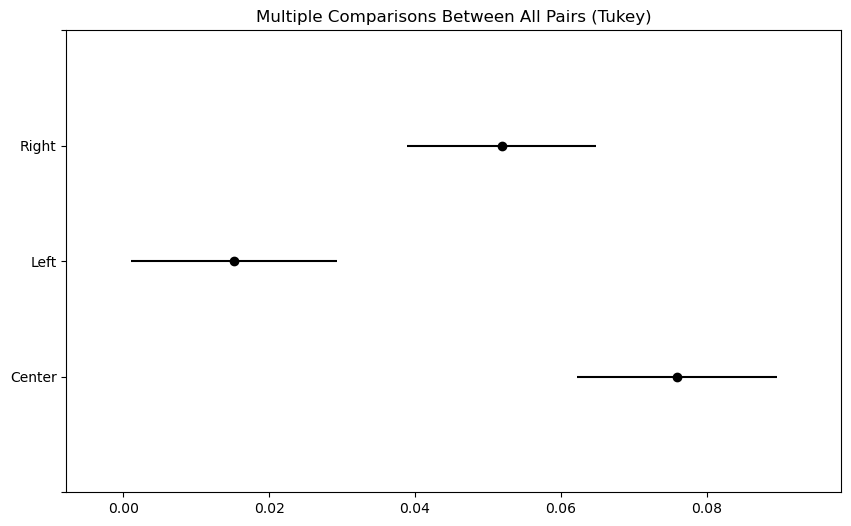

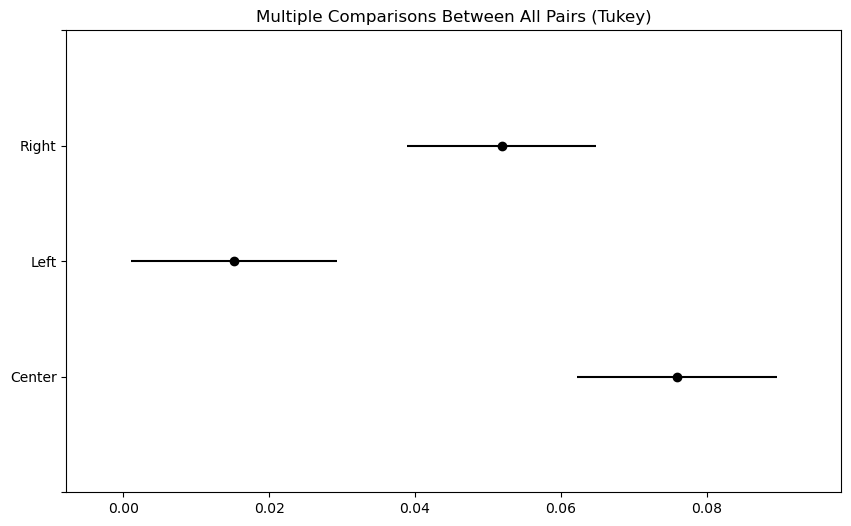

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform ANOVA
model = ols('compound_comment ~ C(leaning) + compound_transcript', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA table
print("ANOVA Results:")
print(anova_table)

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(data['compound_comment'], data['leaning'], alpha=0.05)
print("\nTukey HSD Test Results:")
print(tukey)

# Plot Tukey's HSD results
tukey.plot_simultaneous()

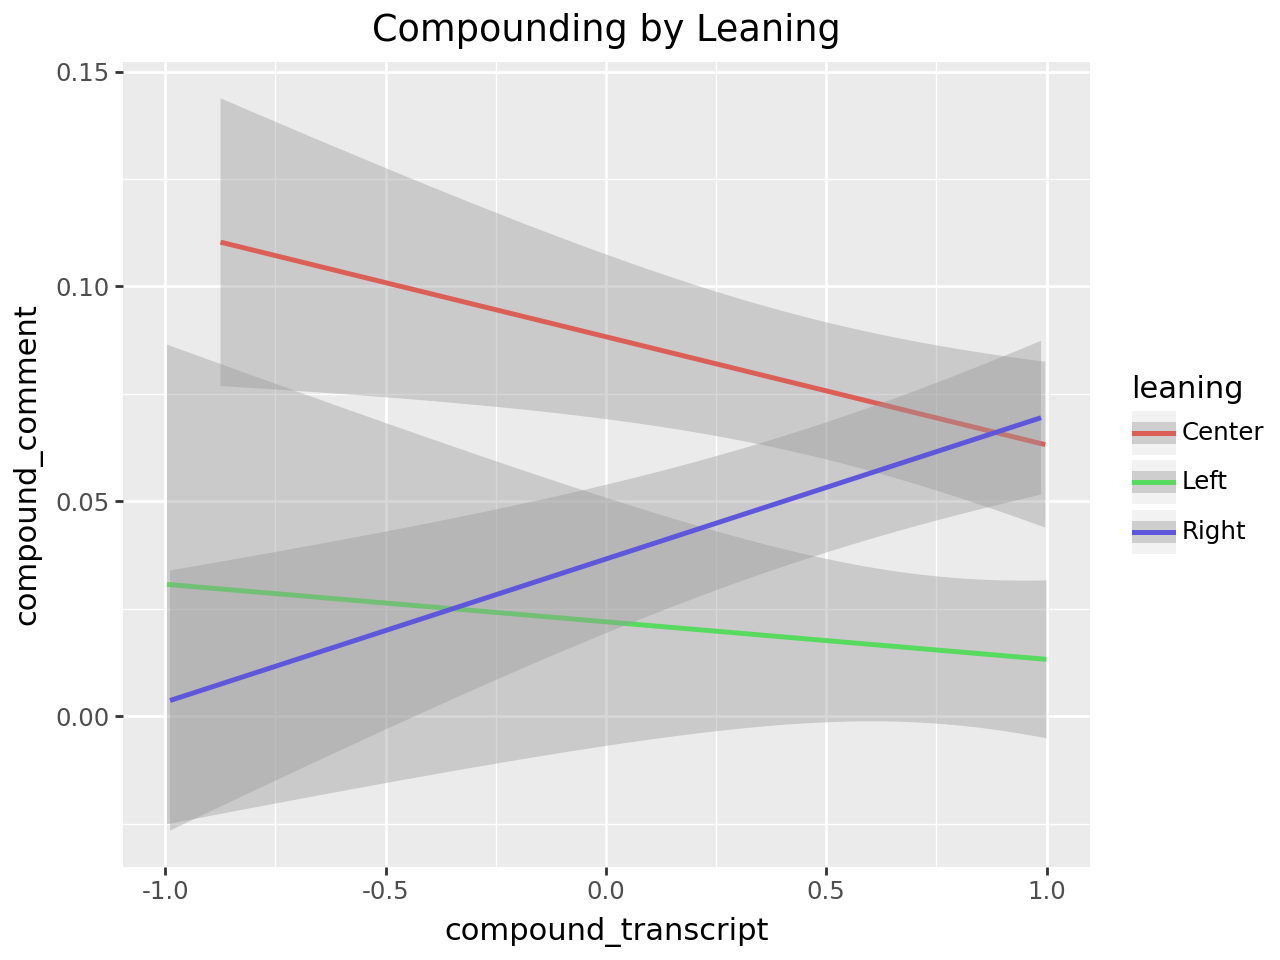

In [6]:
from plotnine import *


(ggplot(data, aes(x='compound_transcript', y='compound_comment', color='leaning')) +
 ggtitle("Compounding by Leaning") +
 geom_smooth(method='lm', se=True))

In [7]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming 'data' is your dataframe
def perform_tukey_test(data):
    # Perform Tukey's HSD test
    tukey_results = pairwise_tukeyhsd(endog=data['compound_comment'],
                                      groups=data['leaning'],
                                      alpha=0.05)

    # Convert results to a dataframe for better visualization
    tukey_df = pd.DataFrame(data=tukey_results.summary().data[1:], 
                            columns=tukey_results.summary().data[0])
    
    return tukey_df

# Example usage
tukey_df = perform_tukey_test(data)
print(tukey_df)


   group1 group2  meandiff   p-adj   lower   upper  reject
0  Center   Left   -0.0607  0.0000 -0.0885 -0.0329    True
1  Center  Right   -0.0240  0.0875 -0.0507  0.0026   False
2    Left  Right    0.0367  0.0042  0.0096  0.0637    True


c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: compound_comment
No. Observations: 9072    Method:             REML            
No. Groups:       3       Scale:              0.2021          
Min. group size:  2796    Log-Likelihood:     -5632.8532      
Max. group size:  3321    Converged:          Yes             
Mean group size:  3024.0                                      
--------------------------------------------------------------
                      Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept             0.044    0.059 0.756 0.450 -0.071  0.159
compound_transcript   0.006    0.006 0.901 0.368 -0.007  0.018
Group Var             0.010                                   



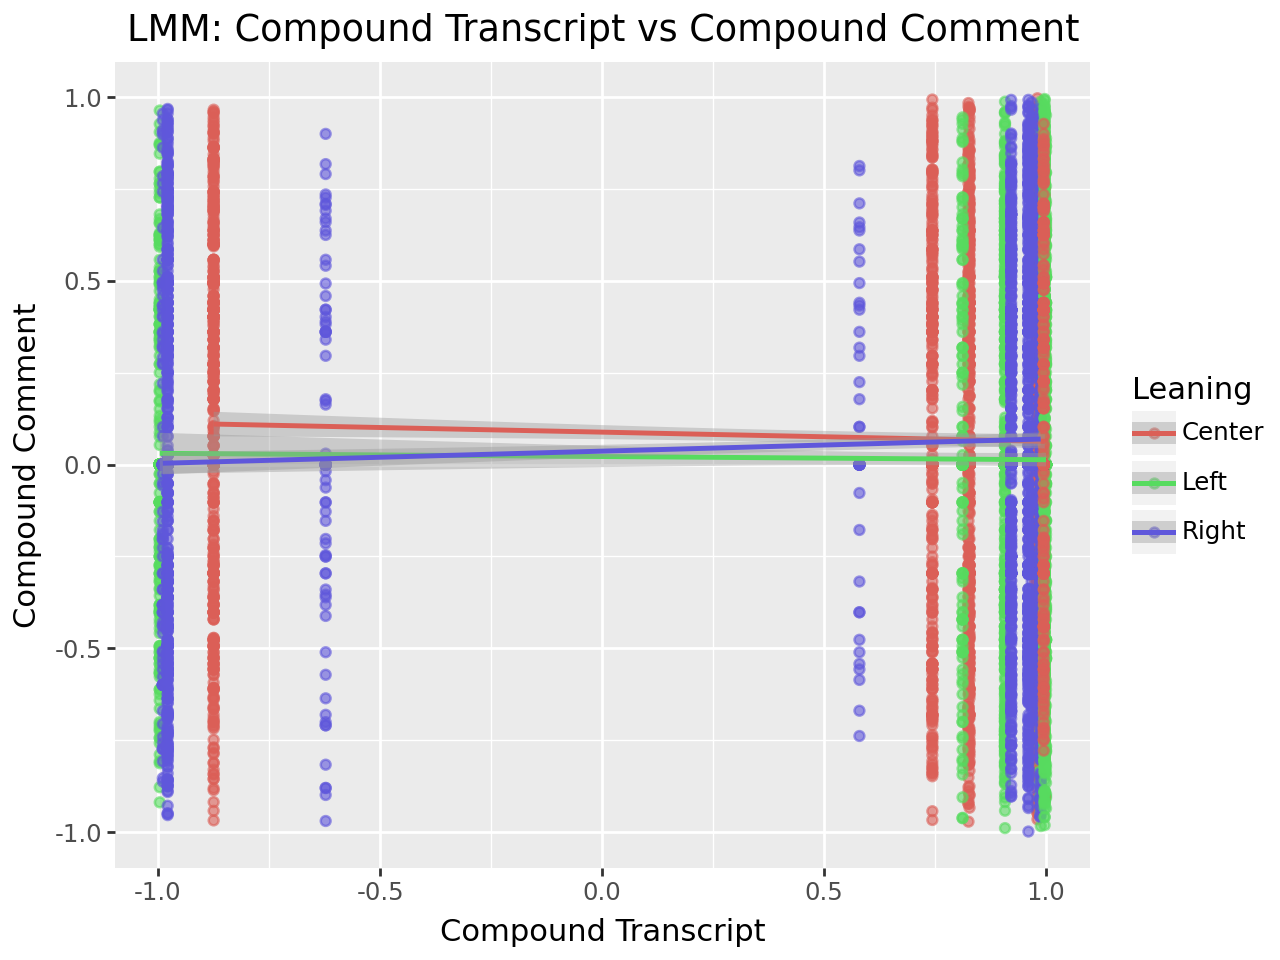

In [8]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import ggplot, aes, geom_point, geom_smooth, theme_minimal, labs

def fit_lmm(data):
    # Fit a linear mixed-effects model
    model = smf.mixedlm("compound_comment ~ compound_transcript", 
                         data, 
                         groups=data["leaning"]).fit()
    return model.summary()

def plot_lmm_trend(data):
    # Create a scatter plot with a regression trend line
    plot = (ggplot(data, aes(x='compound_transcript', y='compound_comment', color='leaning'))
            + geom_point(alpha=0.6)  # Scatter plot points
            + geom_smooth(method='lm', se=True)  # Linear trend line
            + labs(title="LMM: Compound Transcript vs Compound Comment",
                   x="Compound Transcript",
                   y="Compound Comment",
                   color="Leaning")
           )
    return plot

# Example usage
lmm_summary = fit_lmm(data)
print(lmm_summary)

plot = plot_lmm_trend(data)
plot.show()


C:\Users\Trevo\AppData\Local\Temp\ipykernel_5420\3389653994.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
c:\Users\Trevo\anaconda3\envs\predAn\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


             Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: compound_comment
No. Observations:   9072    Method:             REML            
No. Groups:         3       Scale:              0.2021          
Min. group size:    2796    Log-Likelihood:     -5633.0042      
Max. group size:    3321    Converged:          Yes             
Mean group size:    3024.0                                      
----------------------------------------------------------------
                        Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept               0.049    0.059 0.837 0.403 -0.066  0.164
dichotomized_transcript 0.005    0.005 1.030 0.303 -0.005  0.015
Group Var               0.010                                   

   group1 group2  meandiff   p-adj   lower   upper  reject
0  Center   Left   -0.0607  0.0000 -0.0885 -0.0329    True
1  Center  Right   -0.0240  0.0875 -0.0507  0.0026

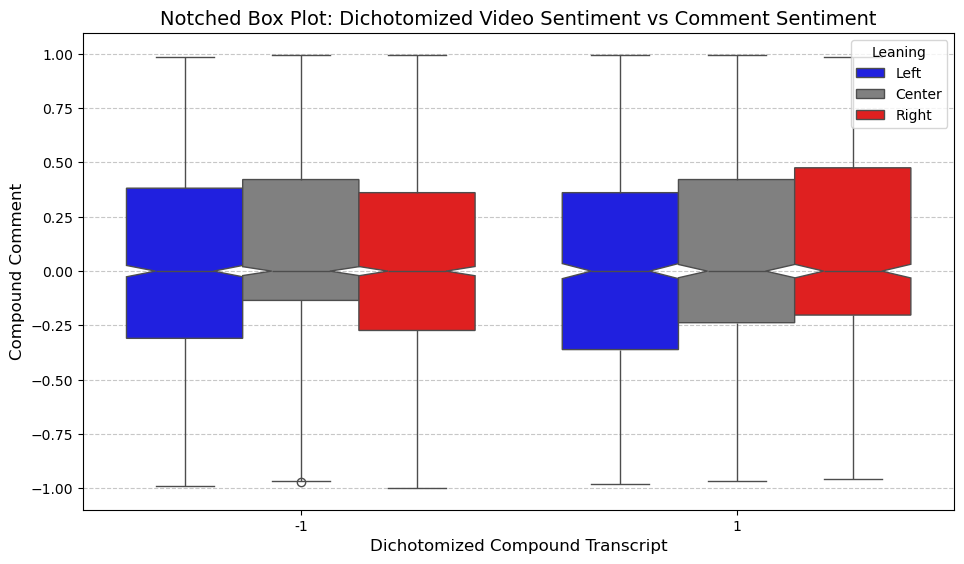

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from plotnine import ggplot, aes, geom_boxplot, theme_minimal, labs, theme

def dichotomize_by_median(data):
    """ Dichotomizes compound_transcript within each 'leaning' group. """
    data = data.copy()  # Avoid modifying original dataframe
    data["dichotomized_transcript"] = data.groupby("leaning")["compound_transcript"].transform(
        lambda x: (x > x.median()).astype(int) * 2 - 1  # Converts to -1 (below median) and +1 (above median)
    )
    return data

def fit_lmm(data):
    """ Fits a linear mixed-effects model on the dichotomized transcript data. """
    model = smf.mixedlm("compound_comment ~ dichotomized_transcript", 
                         data, 
                         groups=data["leaning"]).fit()
    return model.summary()

def perform_tukey_test(data):
    """ Performs a Tukey test to compare compound_comment between the dichotomized transcript groups. """
    tukey_results = pairwise_tukeyhsd(endog=data['compound_comment'],
                                      groups=data['leaning'],
                                      alpha=0.05)

    # Convert results to a dataframe for easier reading
    tukey_df = pd.DataFrame(data=tukey_results.summary().data[1:], 
                            columns=tukey_results.summary().data[0])
    
    return tukey_df

def plot_notched_boxplot(data):
    """ Creates a notched box plot with custom colors: blue, gray, and red, ordered as Left, Center, Right, with spacing between categories. """
    plt.figure(figsize=(10, 6))

    # Define the custom order for the categories
    order = ["Left", "Center", "Right"]

    # Create boxplot with spacing adjustments
    sns.boxplot(x='dichotomized_transcript', y='compound_comment', hue='leaning', data=data, 
                notch=True, palette=["blue", "gray", "red"], hue_order=order, dodge=True, width=0.8)

    plt.title("Notched Box Plot: Dichotomized Video Sentiment vs Comment Sentiment", fontsize=14)
    plt.xlabel("Dichotomized Compound Transcript", fontsize=12)
    plt.ylabel("Compound Comment", fontsize=12)
    plt.legend(title="Leaning", loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust spacing between elements in the figure
    plt.tight_layout(pad=2)

    plt.show()

# Example usage:
data_prime = dichotomize_by_median(data)
lmm_summary = fit_lmm(data_prime)
print(lmm_summary)
tukey_df = perform_tukey_test(data_prime)
print(tukey_df)
plot = plot_notched_boxplot(data_prime)
plot


In [10]:
import pingouin as pg

# Perform one-way ANOVA
anova_results = pg.anova(data=data, dv="compound_comment", between="leaning", detailed=True)

print(anova_results)

    Source           SS    DF        MS          F     p-unc       np2
0  leaning     5.357598     2  2.678799  13.250447  0.000002  0.002914
1   Within  1833.449827  9069  0.202167        NaN       NaN       NaN


In [11]:
posthoc_results = pg.pairwise_tukey(data, dv="compound_comment", between="leaning")

print(posthoc_results)

        A      B   mean(A)  mean(B)      diff        se         T  \
0  Center   Left  0.075883  0.01518  0.060703  0.011863  5.117223   
1  Center  Right  0.075883  0.05187  0.024013  0.011371  2.111881   
2    Left  Right  0.015180  0.05187 -0.036690  0.011540 -3.179276   

        p-tukey    hedges  
0  9.470290e-07  0.134300  
1  8.747137e-02  0.054043  
2  4.228075e-03 -0.081003  


In [12]:
# Model with interaction between 'dichotomized_transcript' and 'leaning'
interaction_model = smf.ols("compound_comment ~ dichotomized_transcript * leaning", data=data_prime).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:       compound_comment   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.876
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           2.07e-07
Time:                        12:09:53   Log-Likelihood:                -5613.2
No. Observations:                9072   AIC:                         1.124e+04
Df Residuals:                    9066   BIC:                         1.128e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

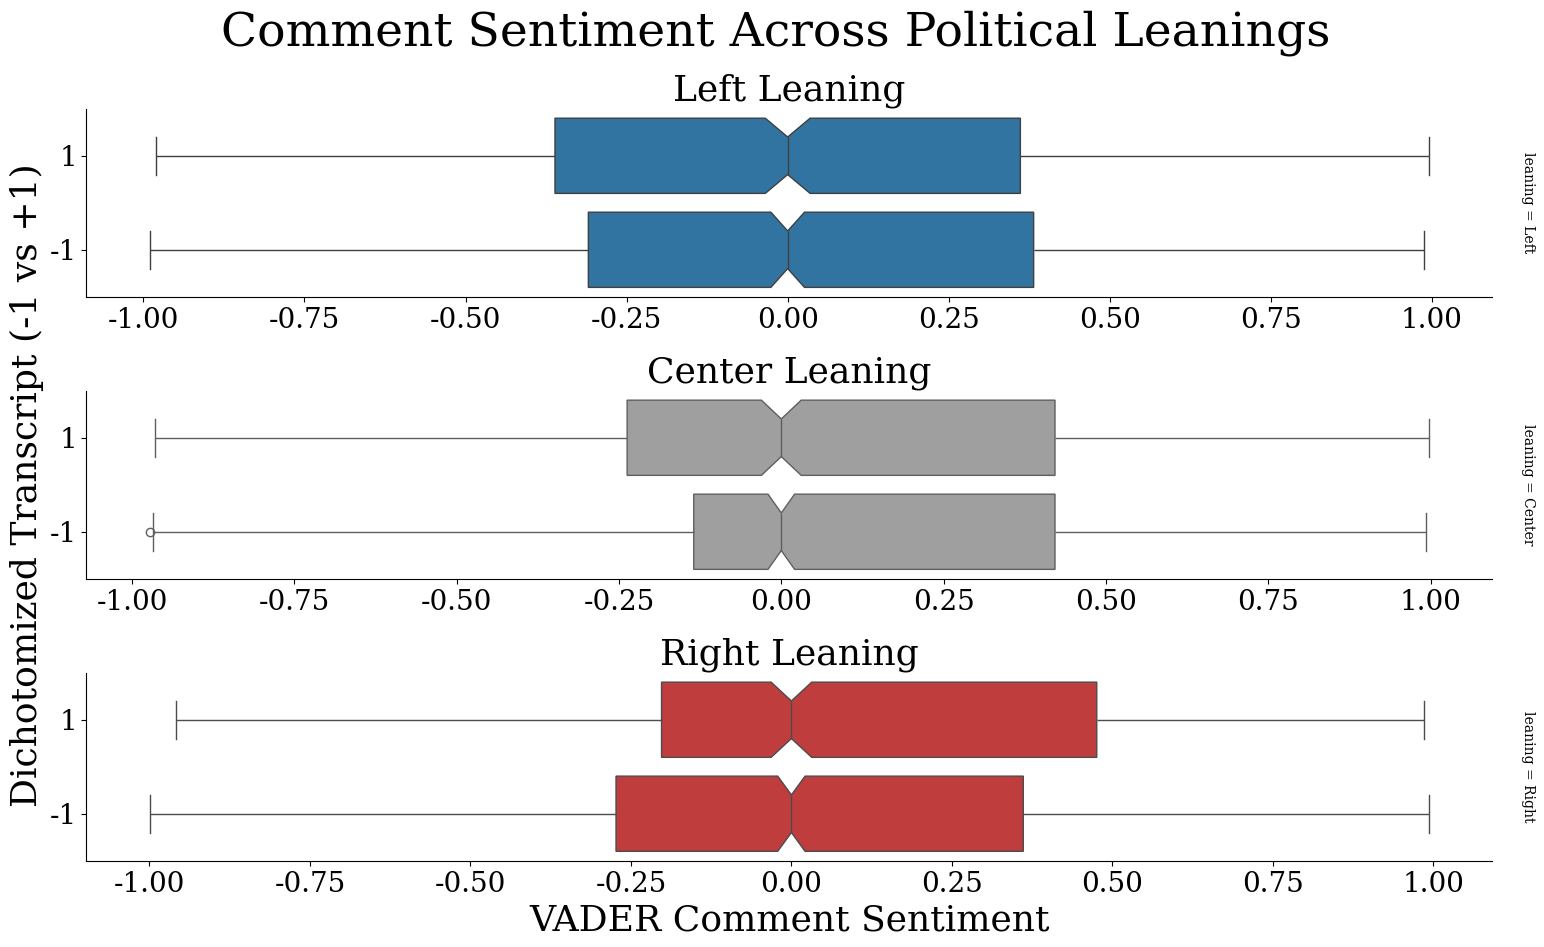

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set font to serif
plt.rcParams["font.family"] = "serif"

# Define categorical order for 'leaning'
order = ["Left", "Center", "Right"]

# Define custom colors for each row
row_colors = {"Left": "#1f77b4", "Center": "#9f9f9f", "Right": "#d62728"}  # Blue, Gray, Red

# Ensure 'leaning' is ordered correctly
data_prime["leaning"] = pd.Categorical(data_prime["leaning"], categories=order, ordered=True)

# Create an empty FacetGrid to control individual plot elements
g = sns.FacetGrid(
    data_prime, row="leaning", height=2, aspect=4, sharex=False, margin_titles=True
)

# Set overall figure size to 16x9
g.fig.set_size_inches(16, 9)

# Add notched boxplots manually to control individual colors
for i, (ax, leaning) in enumerate(zip(g.axes.flat, order)):
    sns.boxplot(
        data=data_prime[data_prime["leaning"] == leaning],
        x="compound_comment", 
        y="dichotomized_transcript",
        orient="h",
        ax=ax,
        color=row_colors[leaning],  # Assign specific colors
        notch=True,  # Enables the notch in the box plot
        order=[1, -1]  # Reverses order so 1 appears first
    )
    ax.set_title(f"{leaning} Leaning", fontsize=26)  # Increased title size
    
    # Increase tick label sizes
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    # Only set the y-label for the middle plot (Center)
    if leaning != "Center":
        ax.set_ylabel("")  # Remove y-axis labels for Top (Left) and Bottom (Right)

# Set x-axis label
g.set_xlabels("VADER Comment Sentiment", fontsize=26)

# Set y-axis label ONLY for the middle plot (Center)
g.axes[1, 0].set_ylabel("Dichotomized Transcript (-1 vs +1)", fontsize=26)

# Add an overarching title
plt.suptitle("Comment Sentiment Across Political Leanings", fontsize=34, y=1.01)

# Adjust layout for better spacing
plt.subplots_adjust(top=0.9, hspace=0.5)  # Increased vertical spacing between graphs

# Optional: Customize tick formatting
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Show the plot
plt.show()


C:\Users\Trevo\AppData\Local\Temp\ipykernel_5420\961418805.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


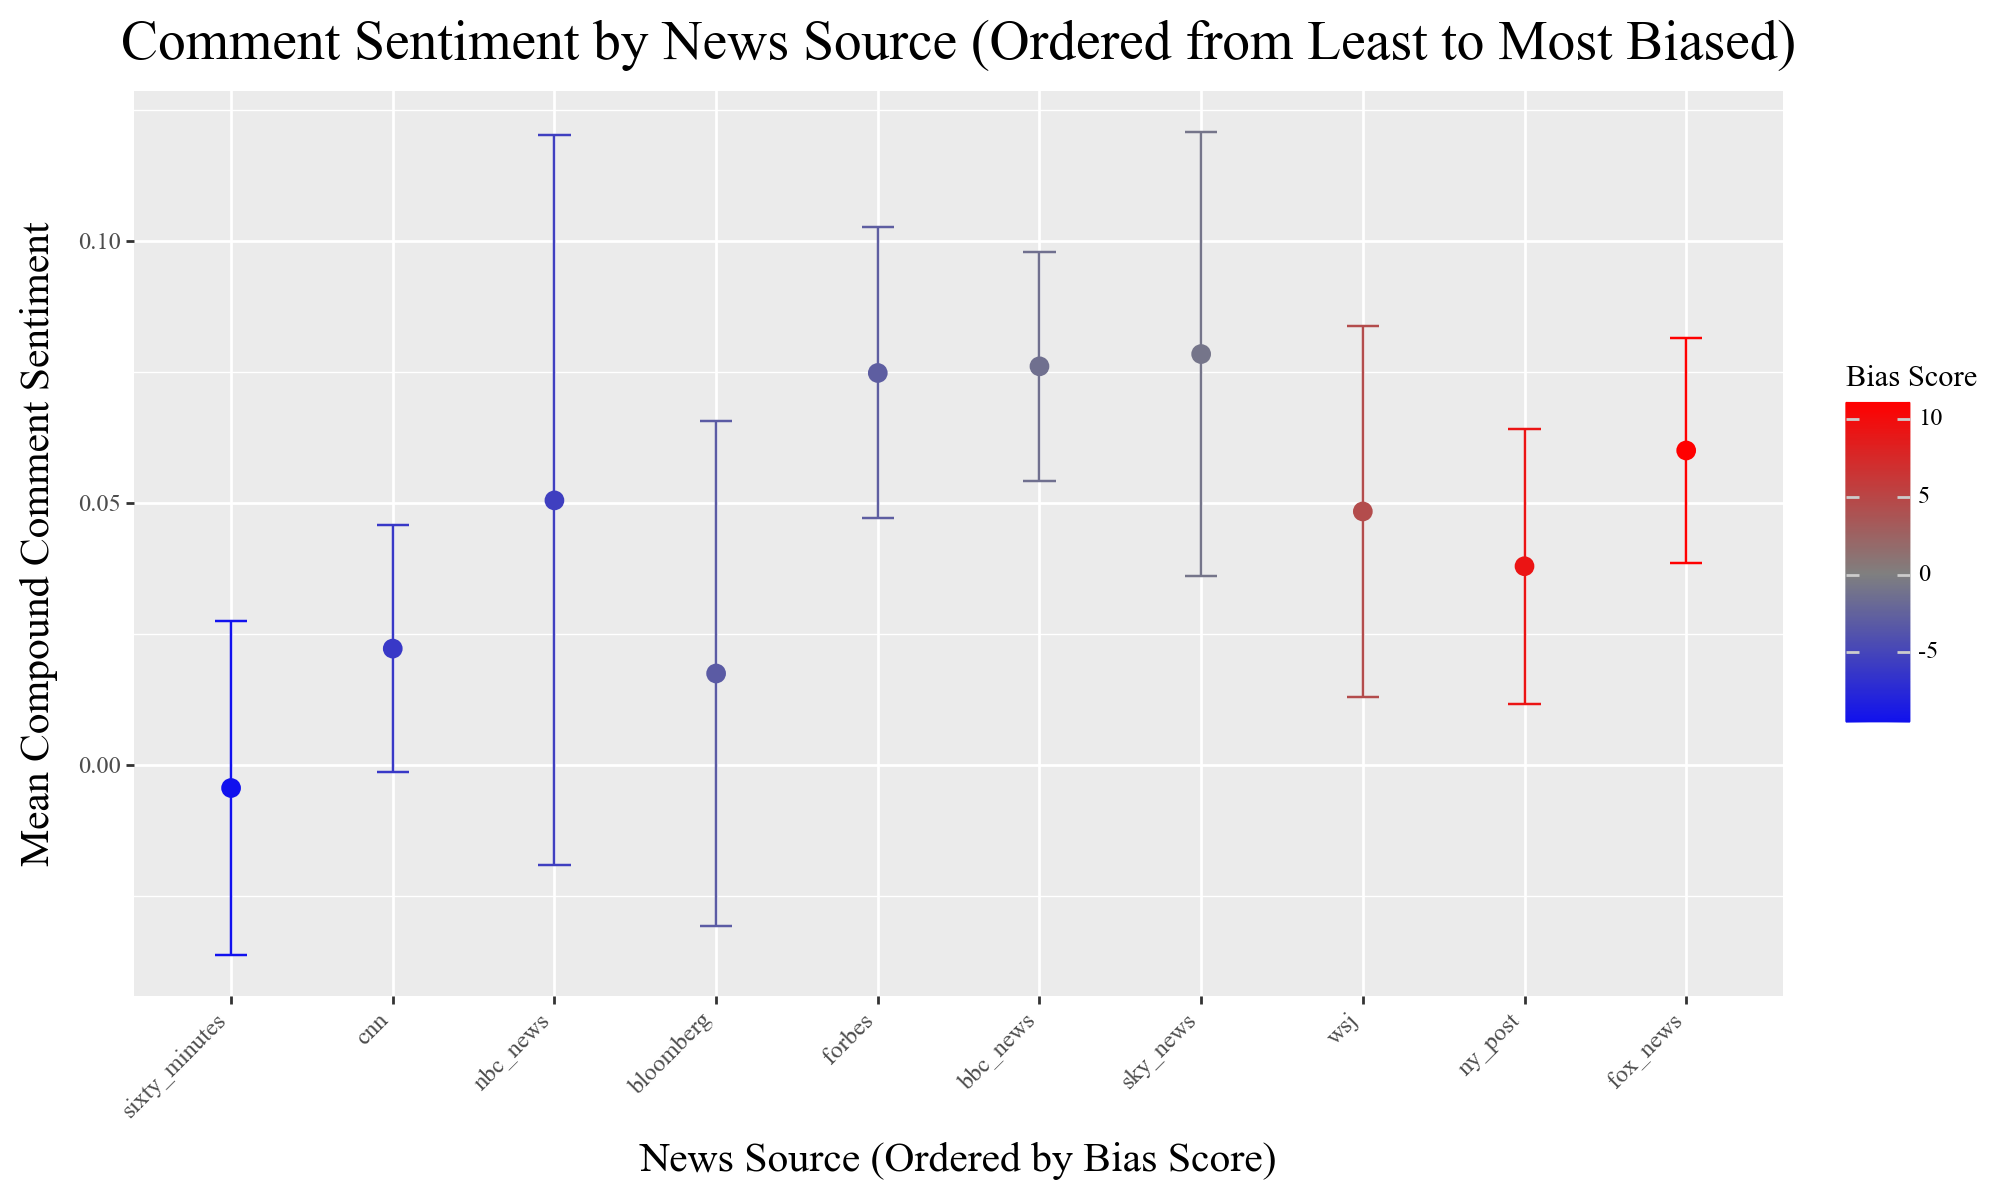

In [29]:
from plotnine import ggplot, aes, geom_point, geom_errorbar, labs, theme, element_text, scale_color_gradient2
import pandas as pd

# Calculate the mean and confidence interval for each source
summary_df = data.groupby('source').agg(
    mean_compound_comment=('compound_comment', 'mean'),
    ci_lower=('compound_comment', lambda x: x.mean() - 1.96 * x.std() / (len(x) ** 0.5)),
    ci_upper=('compound_comment', lambda x: x.mean() + 1.96 * x.std() / (len(x) ** 0.5)),
    bias_score=('bias_score', 'mean')
).reset_index()

# ✅ Sort dataframe from lowest bias score (most neutral) to highest (most biased)
summary_df = summary_df.sort_values(by='bias_score', ascending=True)

# ✅ Convert 'source' to a categorical variable, ensuring correct left-to-right order
summary_df['source'] = pd.Categorical(summary_df['source'], categories=summary_df['source'].tolist(), ordered=True)

# ✅ Create the dot plot with categorical, bias-ordered x-axis
dot_plot = (ggplot(summary_df, aes(x='source', y='mean_compound_comment', color='bias_score')) +
            geom_point(size=3) +
            geom_errorbar(aes(ymin='ci_lower', ymax='ci_upper'), width=0.2) +
            labs(title='Comment Sentiment by News Source (Ordered from Least to Most Biased)',
                 x='News Source (Ordered by Bias Score)',
                 y='Mean Compound Comment Sentiment',
                 color='Bias Score') +
            scale_color_gradient2(low='blue', mid='gray', high='red', midpoint=0) +  # Blue → Gray → Red
            theme(axis_text_x=element_text(rotation=45, hjust=1, family="serif"), 
                  figure_size=(10, 6),
                  plot_title=element_text(size=20, family="serif"),
                  axis_title_x=element_text(size=15, family="serif"),
                  axis_title_y=element_text(size=15, family="serif"),
                  axis_text_y=element_text(family="serif"),
                  legend_title=element_text(family="serif"),
                  legend_text=element_text(family="serif")))  # Ensures all text elements use serif

dot_plot


C:\Users\Trevo\AppData\Local\Temp\ipykernel_5420\639987254.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


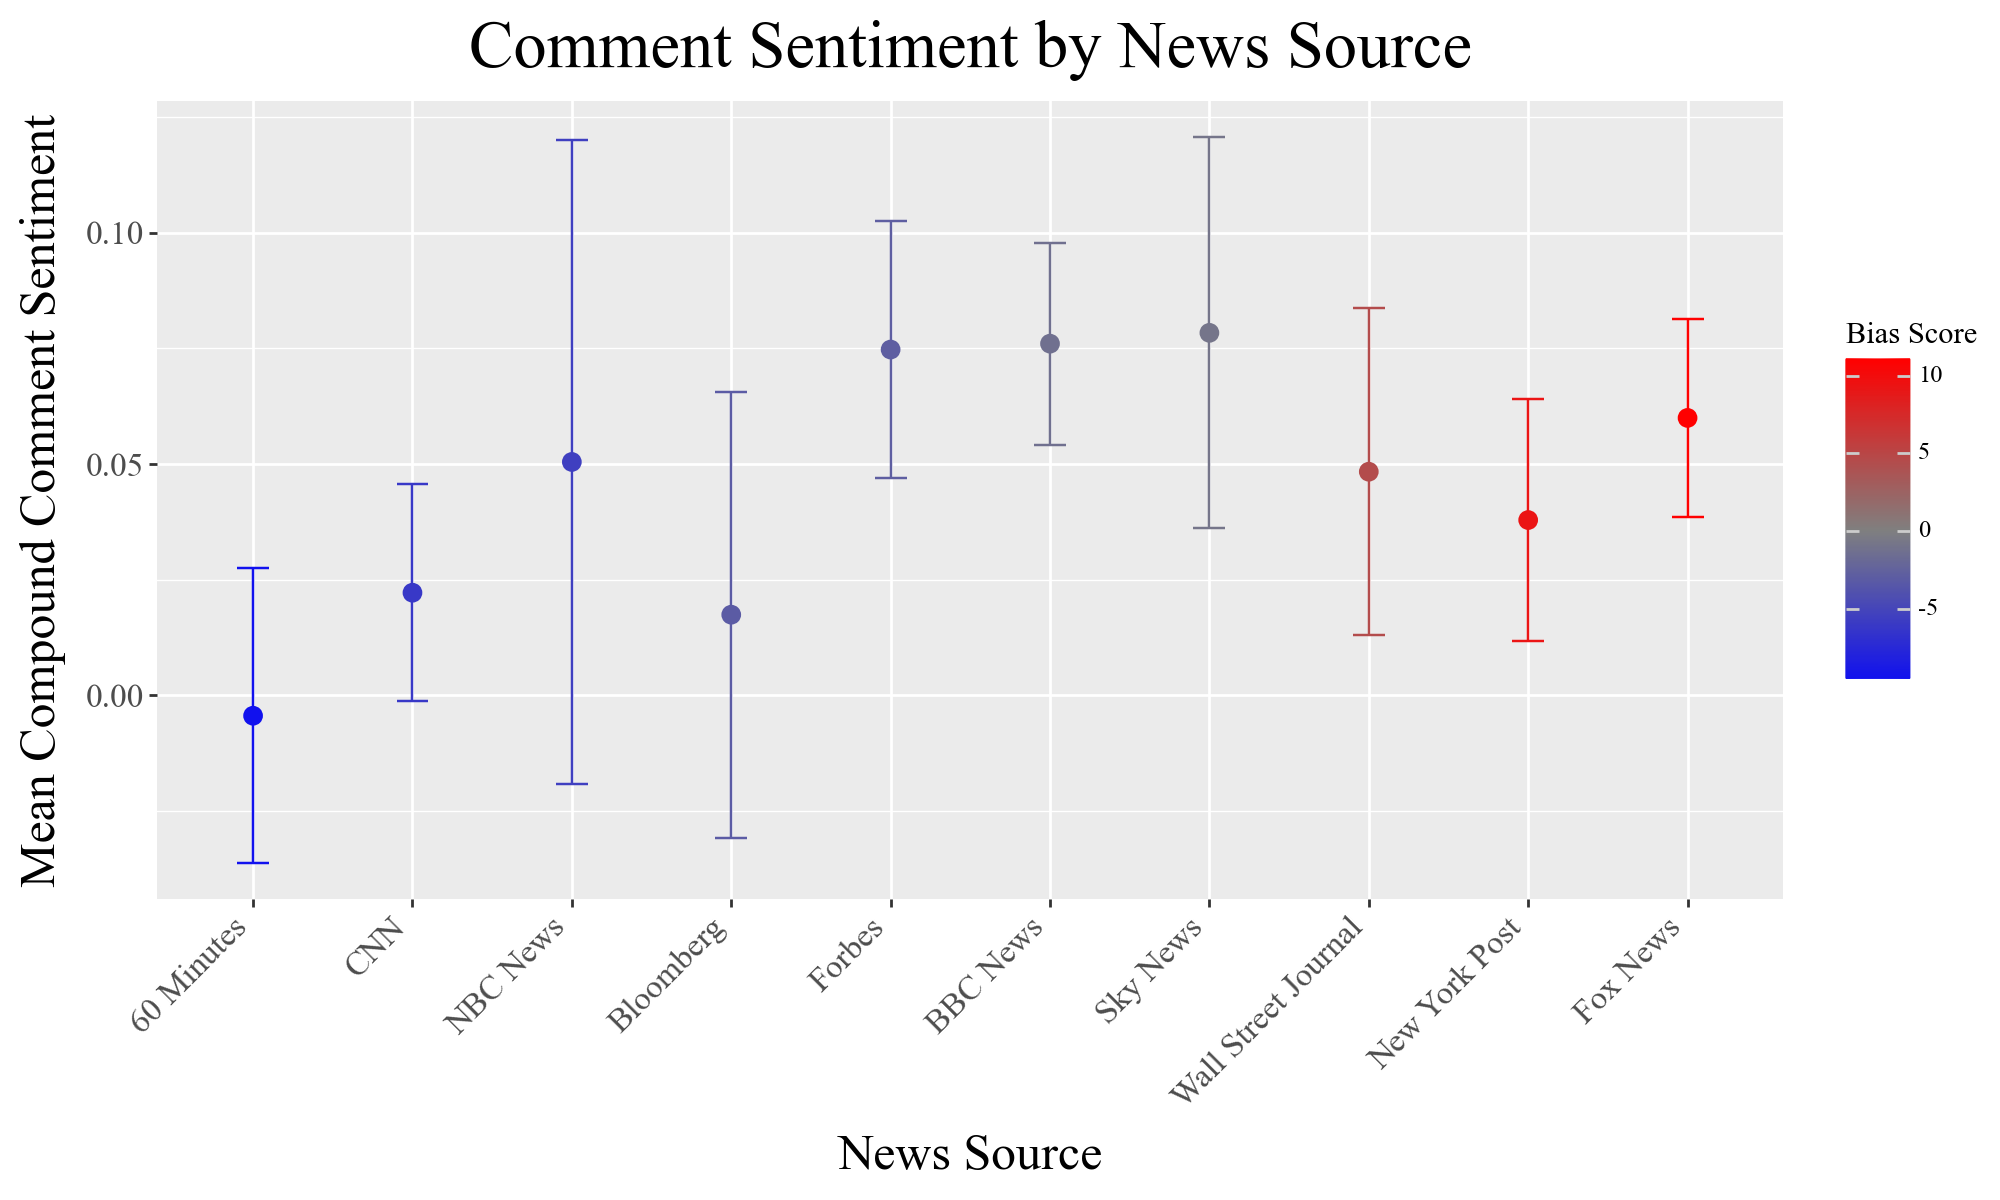

In [41]:
from plotnine import ggplot, aes, geom_point, geom_errorbar, labs, theme, element_text, scale_color_gradient2
import pandas as pd

# Mapping of source identifiers to their properly formatted names
source_labels = {
    'bbc_news': 'BBC News',
    'bloomberg': 'Bloomberg',
    'cnn': 'CNN',
    'forbes': 'Forbes',
    'ny_post': 'New York Post',
    'sixty_minutes': '60 Minutes',
    'sky_news': 'Sky News',
    'wsj': 'Wall Street Journal',
    'fox_news': 'Fox News',
    'nbc_news': 'NBC News',
}

# Calculate the mean and confidence interval for each source
summary_df = data.groupby('source').agg(
    mean_compound_comment=('compound_comment', 'mean'),
    ci_lower=('compound_comment', lambda x: x.mean() - 1.96 * x.std() / (len(x) ** 0.5)),
    ci_upper=('compound_comment', lambda x: x.mean() + 1.96 * x.std() / (len(x) ** 0.5)),
    bias_score=('bias_score', 'mean')
).reset_index()

# ✅ Sort dataframe from most blue (lowest bias score) to least blue (highest bias score)
summary_df = summary_df.sort_values(by='bias_score', ascending=True)

# ✅ Apply source name formatting
summary_df['source'] = summary_df['source'].map(source_labels)

# ✅ Ensure categorical order follows most blue → least blue
summary_df['source'] = pd.Categorical(summary_df['source'], categories=summary_df['source'].tolist(), ordered=True)

# ✅ Create the dot plot with the correct x-axis order
dot_plot = (ggplot(summary_df, aes(x='source', y='mean_compound_comment', color='bias_score')) +
            geom_point(size=3) +
            geom_errorbar(aes(ymin='ci_lower', ymax='ci_upper'), width=0.2) +
            labs(title='Comment Sentiment by News Source',
                 x='News Source',
                 y='Mean Compound Comment Sentiment',
                 color='Bias Score') +
            scale_color_gradient2(low='blue', mid='gray', high='red', midpoint=0) +  # Blue → Gray → Red
            theme(axis_text_x=element_text(rotation=45, hjust=1, family="serif", size=12), 
                  figure_size=(10, 6),
                  plot_title=element_text(size=24, family="serif"),
                  axis_title_x=element_text(size=18, family="serif"),
                  axis_title_y=element_text(size=18, family="serif"),
                  axis_text_y=element_text(family="serif", size=12),
                  legend_title=element_text(family="serif"),
                  legend_text=element_text(family="serif")))  # Ensures all text elements use serif

dot_plot
